In [4]:
import torch
import torch.nn.functional as F

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])

kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])

print(input.shape, kernel.shape)
# math:`(\text{minibatch} , \text{in\_channels} , iH , iW) not suit for con2d input
input = torch.reshape(input, (1, 1, 5, 5))
kernel = torch.reshape(kernel, (1, 1, 3, 3))

torch.Size([5, 5]) torch.Size([3, 3])


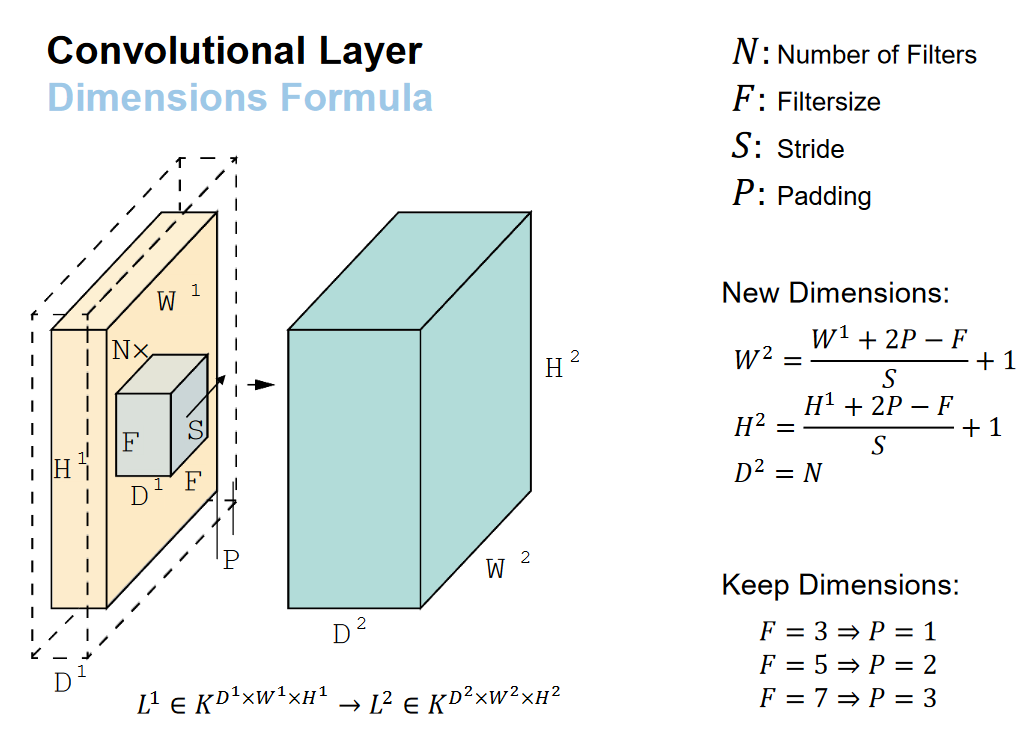

In [5]:
output = F.conv2d(input, kernel, stride=1)
output

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])

In [6]:
output = F.conv2d(input, kernel, stride=2)
output

tensor([[[[10, 12],
          [13,  3]]]])

example conv

In [2]:
import torch
import torchvision
from torch import nn
from torch.nn import Conv2d
from torch.utils.data import DataLoader
from torch.utils.

In [3]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.conv1 = Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)

    def forward(self, x):
        x = self.conv1(x)
        return x

In [10]:
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset", train=True, transform=torchvision.transforms.ToTensor(), download=True)

dataLoader = DataLoader(dataset=dataset, batch_size=64)

myModule = MyModule()

writer = SummaryWriter("logs")
step = 0
for data in dataLoader:
    imgs, targets = data
    output = myModule(imgs)
    writer.add_images("input", imgs, step)
    output = torch.reshape(output, (-1, 3, 30, 30)) # -1 for unknow number
    writer.add_images("output", output, step)
    step += 1

Files already downloaded and verified
